# Salary Data Classification Using Naive Bayes

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import naive_bayes as NB
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

In [2]:
#We have 2 Separate Datasets to train and test
sal_train= pd.read_csv("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Naive Bayes\\SalaryData_Train.csv")
sal_test=pd.read_csv("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Naive Bayes\\SalaryData_Test.csv")

In [3]:
from glob import glob

In [4]:
#We need to create a csv file through which we can concatenate 2 files using glob module
salaries=glob("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Naive Bayes\\SalaryData*.csv")
salaries

['C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Naive Bayes\\SalaryData_Test.csv',
 'C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Naive Bayes\\SalaryData_Train.csv']

In [5]:
#Merging both the datasets in 1 dataset that is going to be named 'Merged'
merged= pd.concat(pd.read_csv(sa) for sa in salaries)
merged.to_csv("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Naive Bayes\\Merged.csv")
merged=merged.reset_index(drop=True)
merged=pd.DataFrame(merged)

In [6]:
#Description of all columns which have numerical Data
merged.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
merged.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
#this column has categorical data , finding unique categories
merged.workclass.unique()

array([' Private', ' Local-gov', ' Self-emp-not-inc', ' Federal-gov',
       ' State-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [10]:
merged.workclass.value_counts()

 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

<AxesSubplot:ylabel='workclass'>

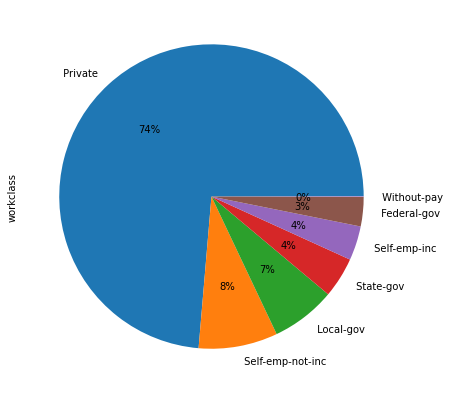

In [11]:
#Here we can see that people with occupation in Private are 74% of the given data 
merged.workclass.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [12]:
le=LabelEncoder()
merged.workclass=le.fit_transform(merged.workclass)

In [13]:
merged.workclass.unique()
#here
# ' Private'-2 
#'Local-gov'-1
#' Self-emp-not-inc'-4
#' Federal-gov'-0
#' State-gov'-5
#' Self-emp-inc'-3
#' Without-pay'-6 

array([2, 1, 4, 0, 5, 3, 6])

In [14]:
#this column has categorical data , finding unique categories
merged.education.unique()

array([' 11th', ' HS-grad', ' Assoc-acdm', ' Some-college', ' 10th',
       ' Prof-school', ' 7th-8th', ' Bachelors', ' Masters', ' 5th-6th',
       ' Assoc-voc', ' 9th', ' Doctorate', ' 12th', ' 1st-4th',
       ' Preschool'], dtype=object)

In [15]:
merged.education.value_counts()

 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

<AxesSubplot:ylabel='education'>

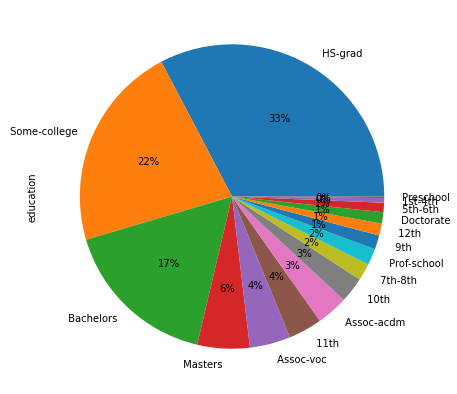

In [16]:
#Here we can see that customers with HS-grade contribute 33% of the data
merged.education.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [17]:
merged.education = le.fit_transform(merged.education)
merged.education.head()

0     1
1    11
2     7
3    15
4     0
Name: education, dtype: int32

In [18]:
#this column has categorical data , finding unique categories
merged.maritalstatus.unique()


array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Separated',
       ' Divorced', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [19]:
merged.maritalstatus.value_counts()

 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus, dtype: int64

<AxesSubplot:ylabel='maritalstatus'>

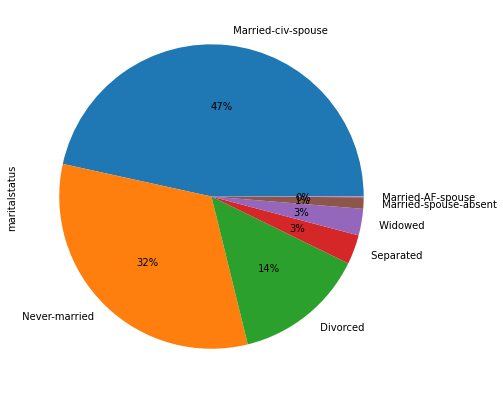

In [20]:
#Here we can see that customers who Married-civ-spouse contribute 47% of the data
merged.maritalstatus.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [21]:
merged.maritalstatus=le.fit_transform(merged.maritalstatus)
merged.maritalstatus.head()

0    4
1    2
2    2
3    2
4    4
Name: maritalstatus, dtype: int32

In [22]:
#this column has categorical data , finding unique categories
merged.occupation.unique()

array([' Machine-op-inspct', ' Farming-fishing', ' Protective-serv',
       ' Other-service', ' Prof-specialty', ' Craft-repair',
       ' Adm-clerical', ' Exec-managerial', ' Tech-support', ' Sales',
       ' Priv-house-serv', ' Transport-moving', ' Handlers-cleaners',
       ' Armed-Forces'], dtype=object)

In [23]:
merged.occupation.value_counts()

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2969
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

<AxesSubplot:ylabel='occupation'>

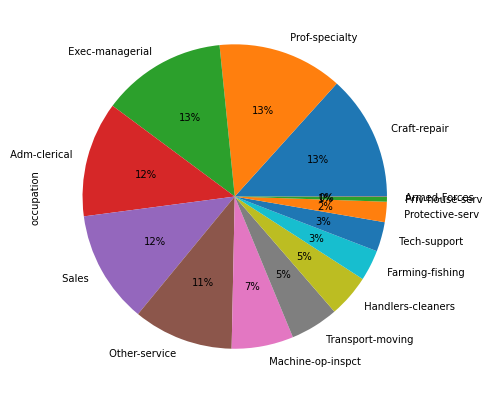

In [24]:
#Here we can see that customers whose occupation is Craft Repair contribute 13% of the data each
merged.occupation.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [25]:
merged.occupation=le.fit_transform(merged.occupation)

In [26]:
merged.occupation.head()

0     6
1     4
2    10
3     6
4     7
Name: occupation, dtype: int32

In [27]:
#this column has categorical data , finding unique categories
merged.relationship.unique()

array([' Own-child', ' Husband', ' Not-in-family', ' Unmarried', ' Wife',
       ' Other-relative'], dtype=object)

In [28]:
merged.relationship.value_counts()

 Husband           18666
 Not-in-family     11702
 Own-child          6626
 Unmarried          4788
 Wife               2091
 Other-relative     1348
Name: relationship, dtype: int64

<AxesSubplot:ylabel='relationship'>

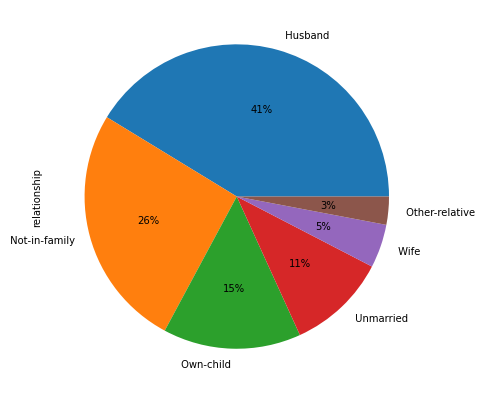

In [29]:
#Here we can see that customers whose Nominees are 'Husband' contribute 41% of the data
merged.relationship.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [30]:
merged.relationship=le.fit_transform(merged.relationship)

In [31]:
#this column has categorical data , finding unique categories
merged.race.unique()

array([' Black', ' White', ' Other', ' Amer-Indian-Eskimo',
       ' Asian-Pac-Islander'], dtype=object)

In [32]:
merged.race.value_counts()

 White                 38902
 Black                  4228
 Asian-Pac-Islander     1303
 Amer-Indian-Eskimo      435
 Other                   353
Name: race, dtype: int64

<AxesSubplot:ylabel='race'>

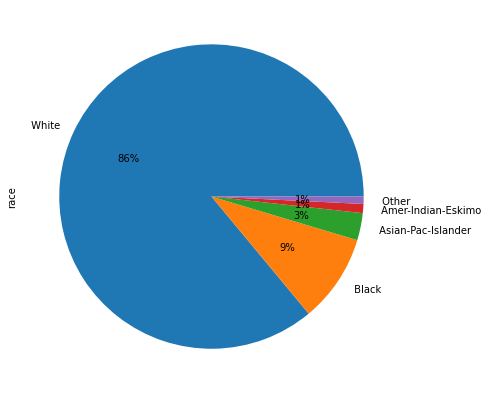

In [33]:
#Here we can see that customers whose Ethnicity is White contribute 86% of the data
merged.race.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [34]:
merged.race=le.fit_transform(merged.race)

In [35]:
#this column has categorical data , finding unique categories
merged.sex.unique()

array([' Male', ' Female'], dtype=object)

In [36]:
merged.sex.value_counts()

 Male      30527
 Female    14694
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

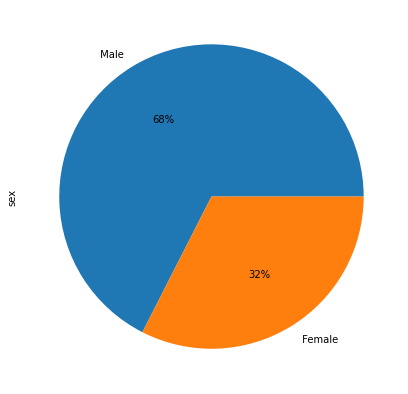

In [37]:
#here Customers who are Male contribute to 68% of the data
merged.sex.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [38]:
merged.sex=le.fit_transform(merged.sex)

In [39]:
#this column has categorical data , finding unique categories
merged.hoursperweek.unique()

array([40, 50, 30, 32, 10, 39, 48, 25, 20, 47, 35, 43, 90, 54, 60, 38, 45,
       36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37, 12, 70, 15, 75,
       52, 84, 42, 80,  8, 68, 99, 65, 17, 72, 53, 96, 21, 46,  3,  1, 49,
       67, 76, 23,  2, 58, 26, 34,  4,  7, 51, 78, 63,  5, 31, 92, 77, 27,
       29, 85,  6, 13, 19, 98, 62, 66, 57, 86, 11, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

In [40]:
merged.hoursperweek.value_counts()

40    21357
50     4094
45     2602
60     2085
35     1776
      ...  
79        1
69        1
87        1
94        1
82        1
Name: hoursperweek, Length: 96, dtype: int64

<AxesSubplot:ylabel='hoursperweek'>

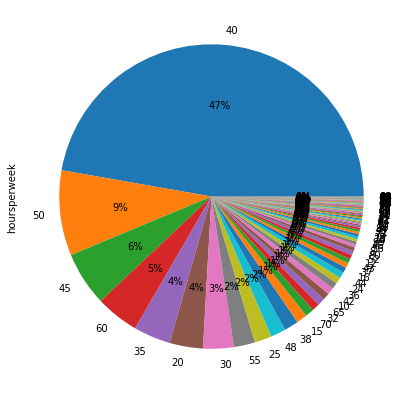

In [41]:
#Customers who work for 40hrs per week  contribute to 47% of data
merged.hoursperweek.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [42]:
merged.hoursperweek=le.fit_transform(merged.hoursperweek)

In [43]:
#this column has categorical data , finding unique categories
merged.native.unique()

array([' United-States', ' Peru', ' Guatemala', ' Mexico',
       ' Dominican-Republic', ' Ireland', ' Germany', ' Philippines',
       ' Thailand', ' Haiti', ' El-Salvador', ' Puerto-Rico', ' Vietnam',
       ' South', ' Columbia', ' Japan', ' India', ' Cambodia', ' Poland',
       ' Laos', ' England', ' Cuba', ' Taiwan', ' Italy', ' Canada',
       ' Portugal', ' China', ' Nicaragua', ' Honduras', ' Iran',
       ' Scotland', ' Jamaica', ' Ecuador', ' Yugoslavia', ' Hungary',
       ' Hong', ' Greece', ' Trinadad&Tobago',
       ' Outlying-US(Guam-USVI-etc)', ' France'], dtype=object)

In [44]:
merged.native.value_counts()

 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

<AxesSubplot:ylabel='native'>

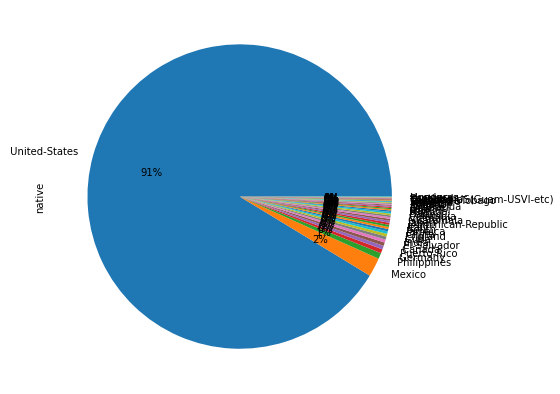

In [45]:
#Customers who are Native to United states contribute to 91% of data
merged.native.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [46]:
merged.native=le.fit_transform(merged.native)

In [47]:
#this column has categorical data , finding unique categories
merged.Salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [48]:
merged.Salary.value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

<AxesSubplot:ylabel='Salary'>

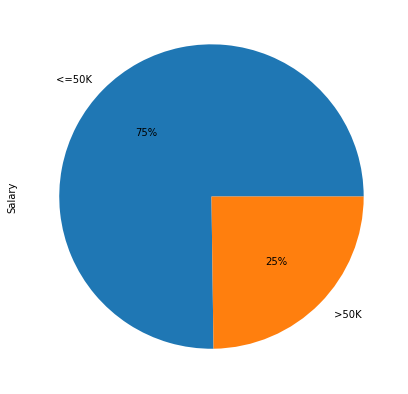

In [49]:
#Customers whose  salary is less than or equal to 50k $ contribute to 75% of data
merged.Salary.value_counts().plot(kind='pie',autopct='%.0f%%',figsize=(7,7))

In [50]:
merged.Salary=le.fit_transform(merged.Salary)

In [51]:
#this column has categorical data , finding unique categories
merged.age.unique()

array([25, 38, 28, 44, 34, 63, 24, 55, 65, 36, 26, 48, 43, 20, 37, 45, 22,
       23, 54, 32, 46, 56, 17, 29, 39, 52, 18, 21, 42, 33, 30, 47, 41, 19,
       69, 50, 31, 59, 49, 58, 40, 27, 57, 61, 51, 73, 53, 80, 62, 35, 72,
       64, 68, 66, 60, 67, 71, 70, 90, 77, 81, 74, 78, 82, 75, 85, 76, 89,
       83, 79, 88, 87, 84, 86], dtype=int64)

In [52]:
merged.age.value_counts()

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
87       1
86       1
Name: age, Length: 74, dtype: int64

In [53]:
merged.age=le.fit_transform(merged.age)

In [54]:
merged.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,7,4,6,3,2,1,0,0,39,37,0
1,21,2,11,9,2,4,0,4,1,0,0,49,37,0
2,11,1,7,12,2,10,0,4,1,0,0,39,37,1
3,27,2,15,10,2,6,0,2,1,7688,0,39,37,1
4,17,2,0,6,4,7,1,4,1,0,0,29,37,0


In [55]:
report=sv.analyze(merged)
report.show_html("Salary_DATA_EDA.html")

                                             |          | [  0%]   00:00 -> (? left)

Report Salary_DATA_EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [56]:
from sklearn.model_selection import train_test_split

In [57]:
#dropping education no. column as  this feature is not going to help in model creation 
merged1=merged.drop(['educationno'],axis=1)
merged1.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [58]:
X=merged1.iloc[:,:12]
Y=merged1.iloc[:,12:]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=46)

In [60]:
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import BernoulliNB as BNB

classifier_MNB=MNB()
classifier_MNB.fit(x_train,y_train)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

# MULTINOMIAL NAIVE BAYES CLASSIFICATION

In [61]:
y_pred_MNBtrain=classifier_MNB.predict(x_train)
accuracy_score(y_train,y_pred_MNBtrain)

0.7740885828015417

In [62]:
y_pred_MNBtest=classifier_MNB.predict(x_test)
MNB_test_score=accuracy_score(y_test,y_pred_MNBtest)
MNB_test_score

0.7724625930566816

In [63]:
from sklearn.metrics import confusion_matrix
cm_MNB=confusion_matrix(y_test,y_pred_MNBtest) 
cm_MNB

array([[9783,  393],
       [2694,  697]], dtype=int64)

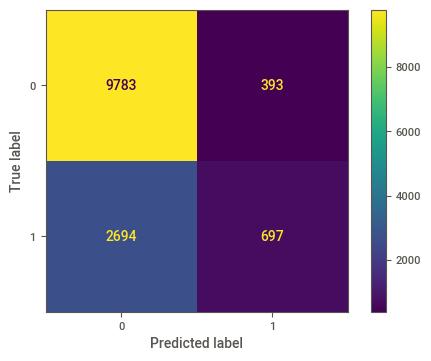

In [64]:
#Displaying Confusion Matrix to clearly find True label and Predicted label
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp=ConfusionMatrixDisplay(cm_MNB,display_labels=classifier_MNB.classes_)
disp.plot()
plt.show()

In [65]:
print(classification_report(y_test,y_pred_MNBtest),""" 

            MULTINOMIAL NAIVE BAYES CLASSIFICATION""")

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     10176
           1       0.64      0.21      0.31      3391

    accuracy                           0.77     13567
   macro avg       0.71      0.58      0.59     13567
weighted avg       0.75      0.77      0.73     13567
  

            MULTINOMIAL NAIVE BAYES CLASSIFICATION


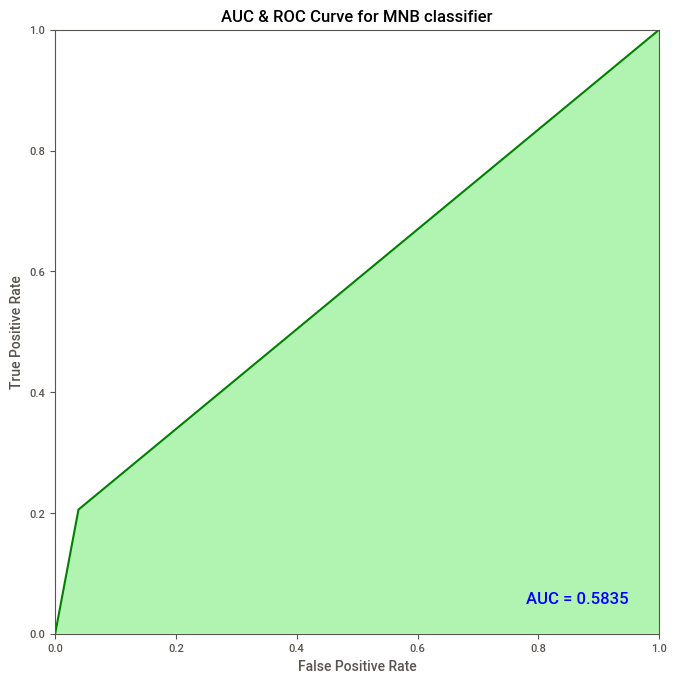

In [66]:
#AUC and ROC curve 
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_MNBtest)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_MNBtest)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for MNB classifier")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# GAUSSIAN NAIVE BAYES CLASSIFICATION

In [67]:
classifier_GNB=GNB()
classifier_GNB.fit(x_train,y_train)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [68]:
y_pred_GNBtrain=classifier_GNB.predict(x_train)
accuracy_score(y_train,y_pred_GNBtrain)

0.7919062361786819

In [69]:
y_pred_GNBtest=classifier_GNB.predict(x_test)
GNB_test_score=accuracy_score(y_test,y_pred_GNBtest)
GNB_test_score

0.7934694479251124

In [70]:
cm_GNB=confusion_matrix(y_test,y_pred_GNBtest) 
cm_GNB



array([[9746,  430],
       [2372, 1019]], dtype=int64)

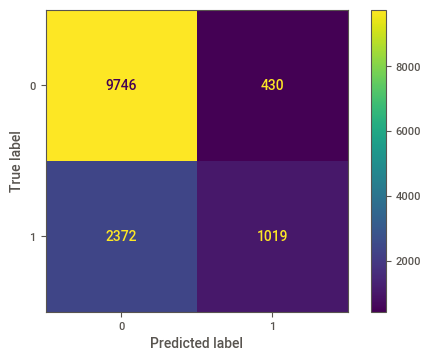

In [71]:
#Displaying Confusion Matrix to clearly find True label and Predicted label
disp=ConfusionMatrixDisplay(cm_GNB,display_labels=classifier_GNB.classes_)
disp.plot()
plt.show()



In [72]:
print(classification_report(y_test,y_pred_GNBtest),""" 
                                                         
            GAUSSIAN NAIVE BAYES CLASSIFICATION """)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87     10176
           1       0.70      0.30      0.42      3391

    accuracy                           0.79     13567
   macro avg       0.75      0.63      0.65     13567
weighted avg       0.78      0.79      0.76     13567
  
                                                         
            GAUSSIAN NAIVE BAYES CLASSIFICATION 


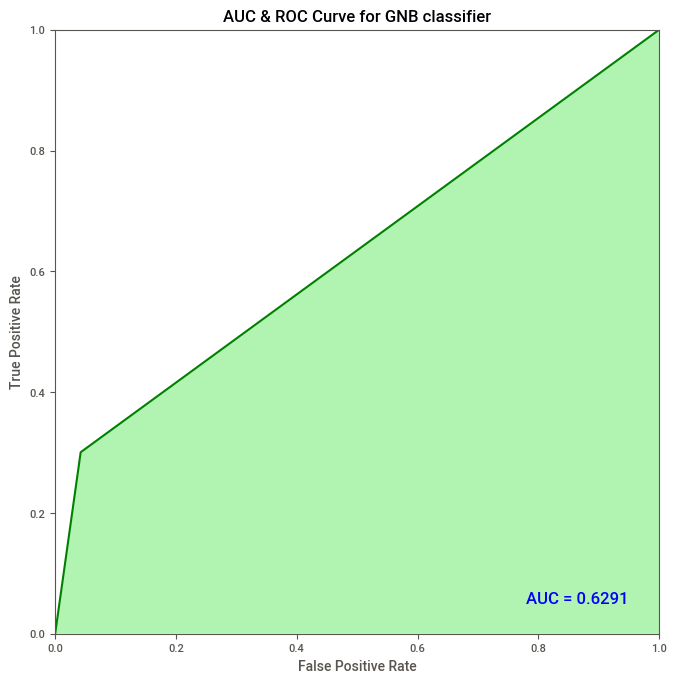

In [73]:
#AUC and ROC curve 
auc = metrics.roc_auc_score(y_test, y_pred_GNBtest)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_GNBtest)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for GNB classifier")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# BERNOULLI NAIVE BAYES CLASSIFICATION

In [74]:
classifier_BNB=BNB()
classifier_BNB.fit(x_train,y_train)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [75]:
y_pred_BNBtrain=classifier_BNB.predict(x_train)
accuracy_score(y_train,y_pred_BNBtrain)

0.7276805459025716

In [76]:
y_pred_BNBtest=classifier_BNB.predict(x_test)
BNB_test_score=accuracy_score(y_test,y_pred_BNBtest)
BNB_test_score

0.7246996388295128

In [77]:
cm_BNB=confusion_matrix(y_test,y_pred_BNBtest) 
cm_BNB

array([[7392, 2784],
       [ 951, 2440]], dtype=int64)

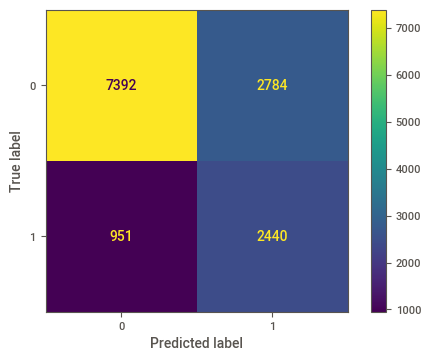

In [78]:
#Displaying Confusion Matrix to clearly find True label and Predicted label
disp=ConfusionMatrixDisplay(cm_BNB,display_labels=classifier_BNB.classes_)
disp.plot()
plt.show()

In [79]:
print(classification_report(y_test,y_pred_BNBtest),"""                          
                            
             BERNOULLI NAIVE BAYES CLASSIFICATION """)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80     10176
           1       0.47      0.72      0.57      3391

    accuracy                           0.72     13567
   macro avg       0.68      0.72      0.68     13567
weighted avg       0.78      0.72      0.74     13567
                           
                            
             BERNOULLI NAIVE BAYES CLASSIFICATION 


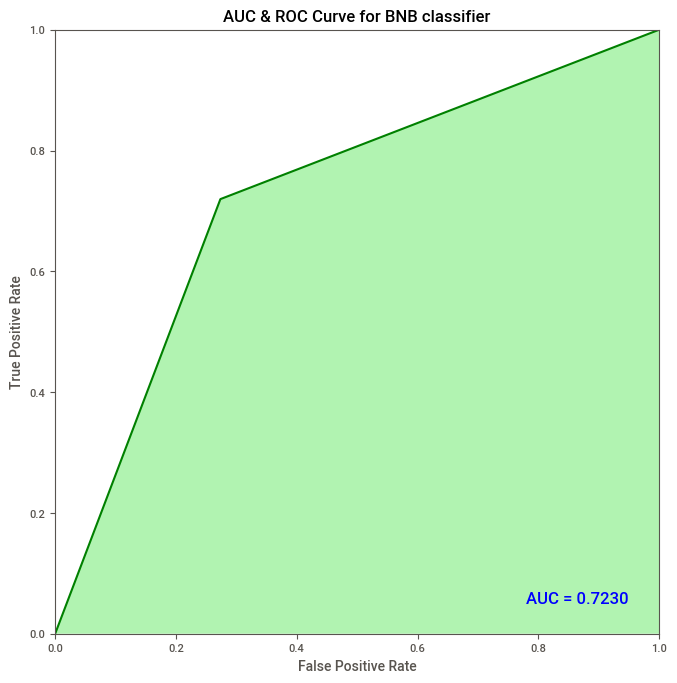

In [80]:
#AUC and ROC curve 
auc = metrics.roc_auc_score(y_test, y_pred_BNBtest)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred_BNBtest)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for BNB classifier")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [81]:
print("MULTINOMIAL NAIVE BAYES test accuracy score is =",MNB_test_score)
print("GAUSSIAN NAIVE BAYES test accuracy score is =",GNB_test_score)
print("BERNOULLI NAIVE BAYES test accuracy score is =",BNB_test_score)


MULTINOMIAL NAIVE BAYES test accuracy score is = 0.7724625930566816
GAUSSIAN NAIVE BAYES test accuracy score is = 0.7934694479251124
BERNOULLI NAIVE BAYES test accuracy score is = 0.7246996388295128


# We will select GAUSSIAN NAIVE BAYES since its test accuracy score is 0.79 when compared to other Naive Bayes Classifiers.